In [1]:
import seaborn as sns

In [131]:
x = pd.read_csv('/Users/ishitajain/Downloads/Datathon Data/Energy Data - Emissions.csv')


In [138]:
x['Date'] = pd.to_datetime(x['Date'])
x.sort_values('Date',inplace=True)

x.head(120)

,MSN,YYYYMM,Date,Value,Column_Order,Description,Unit,Energy Type,Energy Class,Sector
0,CKTCEUS,197301,1973-01-01,109.552,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,Coal,Coal,NaN
28717,CLACEUS,197301,1973-01-01,0,1,Coal Transportation Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,Coal,Coal,Transportation
47658,BMTCEUS,197301,1973-01-01,12.169,11,Biomass CO2 Emissions,Million Metric Tons of Carbon Dioxide,Total,Biomass,NaN
20163,CLICEUS,197301,1973-01-01,33.48,1,Coal Industrial Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,Coal,Coal,Industrial
37271,DKEIEUS,197301,1973-01-01,2.397,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide,Distillate Fuel Oil,Petroleum,Electric Power
40937,TXEIEUS,197301,1973-01-01,111.499,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,Total,Total,Electric Power
7332,PMTCEUS,197301,1973-01-01,218.972,13,"Petroleum, Excluding Biofuels, CO2 Emissions",Million Metric Tons of Carbon Dioxide,Total,Petroleum,NaN
35438,TEACEUS,197301,1973-01-01,106.176,12,Total Energy Transportation Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,Total,Total,Transportation
46436,BMACEUS,197301,1973-01-01,Not Available,9,Biomass Transportation Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,Biomass,Total,Transportation
4888,MMTCEUS,197301,1973-01-01,70.948,9,"Motor Gasoline, Excluding Ethanol, CO2 Emissions",Million Metric Tons of Carbon Dioxide,Motor Gasoline,Petroleum,NaN


In [95]:
emissions_df = pd.read_csv('/Users/ishitajain/Downloads/Datathon Data/Energy Data - Emissions.csv')
emissions_df.rename(columns={'MSN': 'EIA_ID'}, inplace=True)
emissions_df = emissions_df[~emissions_df['Value'].isna() &
                            (emissions_df['Value'] != 'Not Available') &
                            (emissions_df['Value'] != 'Not Meaningful') &
                            (emissions_df['Value'] != 'No Data Reported')]

emissions_df['Sector'] = emissions_df['Sector'].replace({'N/A': 'Overall', '': 'Overall', np.nan: 'Overall'})
emissions_df.rename(columns={'Value': 'Emission (Mton Co2)'}, inplace=True)
emissions_df.drop(columns=['Unit'], inplace=True)
emissions_df['Emission (Mton Co2)'] = emissions_df['Emission (Mton Co2)'].astype(float)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
consumption_df = pd.read_csv('/Users/ishitajain/Downloads/Datathon Data/Energy Data - Consumption.csv')
emissions_df = pd.read_csv('/Users/ishitajain/Downloads/Datathon Data/Energy Data - Emissions.csv')

# Rename columns to ensure consistency
emissions_df.rename(columns={'MSN': 'EIA_ID'}, inplace=True)
consumption_df.drop(columns=['Energy Category'], inplace=True)

# Remove rows with missing, 'Not Available', or 'Not Meaningful' values in the 'Value' column
consumption_df = consumption_df[~consumption_df['Value'].isna() &
                                (consumption_df['Value'] != 'Not Available') &
                                (consumption_df['Value'] != 'Not Meaningful') &
                                (consumption_df['Value'] != 'No Data Reported')]
emissions_df = emissions_df[~emissions_df['Value'].isna() &
                            (emissions_df['Value'] != 'Not Available') &
                            (emissions_df['Value'] != 'Not Meaningful') &
                            (emissions_df['Value'] != 'No Data Reported')]

# Handle 'N/A', empty, and NaN values in the 'Sector' column to denote 'Overall'
consumption_df['Sector'] = consumption_df['Sector'].replace({'N/A': 'Overall', '': 'Overall', np.nan: 'Overall'})
emissions_df['Sector'] = emissions_df['Sector'].replace({'N/A': 'Overall', '': 'Overall', np.nan: 'Overall'})

# Since the emissions DataFrame was adjusted to match the consumption DataFrame columns
# Ensure the column order in emissions_df matches that of consumption_df before merging
emissions_df = emissions_df[consumption_df.columns]

# reset emissions value to emission
emissions_df.rename(columns={'Value': 'Emission (Mton Co2)'}, inplace=True)
emissions_df.drop(columns=['Unit'], inplace=True)
consumption_df.rename(columns={'Value': 'Consumption'}, inplace=True)
consumption_df['Consumption'] = consumption_df['Consumption'].astype(float)
emissions_df['Emission (Mton Co2)'] = emissions_df['Emission (Mton Co2)'].astype(float)



,EIA_ID,YYYYMM,Date,Emission (Mton Co2),Column_Order,Description,Energy Type,Energy Class,Sector
0,CKTCEUS,197301,1/1/1973,109.552,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Coal,Coal,Overall
25662,RFICEUS,197301,1/1/1973,12.202,10,Residual Fuel Oil Industrial Sector CO2 Emissions,Residual Fuel Oil,Petroleum,Industrial
7332,PMTCEUS,197301,1/1/1973,218.972,13,"Petroleum, Excluding Biofuels, CO2 Emissions",Total,Petroleum,Overall
25051,PCICEUS,197301,1/1/1973,4.722,9,Petroleum Coke Industrial Sector CO2 Emissions,Petroleum Coke,Petroleum,Industrial
24440,MMICEUS,197301,1/1/1973,1.415,8,"Motor Gasoline, Excluding Ethanol, Industrial ...",Motor Gasoline,Petroleum,Industrial
23829,LUICEUS,197301,1/1/1973,0.565,7,Lubricants Industrial Sector CO2 Emissions,Lubricants,Petroleum,Industrial
7943,TETCEUS,197301,1/1/1973,454.082,14,Total Energy CO2 Emissions,Total,Total,Overall
45214,BMCCEUS,197301,1/1/1973,0.053,7,Biomass Commercial Sector CO2 Emissions,Biomass,Total,Commercial
23218,KSICEUS,197301,1/1/1973,1.817,6,Kerosene Industrial Sector CO2 Emissions,Kerosene,Petroleum,Industrial
22607,HLICEUS,197301,1/1/1973,3.244,5,HGL Industrial Sector CO2 Emissions,Hydrocarbon Gas Liquids (HGL),Petroleum,Industrial


In [4]:
consumption_df['Consumption'] = consumption_df.apply(lambda row: row['Consumption'] * (0.14533783783/1000) if row['Unit'] == 'Thousand Barrels per Day' else row['Consumption'], axis=1)
consumption_df['Consumption'] = consumption_df.apply(lambda row: row['Consumption'] * 0.00103404518 if row['Unit'] == 'Billion Cubic Feet' else row['Consumption'], axis=1)
consumption_df['Consumption'] = consumption_df.apply(lambda row: row['Consumption'] * 0.00001921426 if row['Unit'] == 'Thousand Short Tons' else row['Consumption'], axis=1)
consumption_df['Consumption'] = consumption_df.apply(lambda row: row['Consumption'] * 0.001 if row['Unit'] == 'Trillion Btu' else row['Consumption'], axis=1)

consumption_df.rename(columns={'Consumption': 'Consumption (quadrillion Btu)'}, inplace=True)
consumption_df.drop(columns=['Unit'], inplace=True)


In [5]:
consumption_df.sort_values(['Date'],inplace=True)

In [23]:
pd.set_option('display.max_rows', None)

consumption_df.loc[consumption_df['Energy Type'] == 'Total'].tail(100)

,EIA_ID,YYYYMM,Date,Consumption (quadrillion Btu),Column_Order,Description,Energy Type,Energy Class,Sector
48928,NGACPUS,201709,9/1/2017,0.056330,10,Natural Gas Consumed by the Transportation Sec...,Total,Natural Gas,Transportation
57492,CLTCPUS,201709,9/1/2017,1.134399,12,"Coal Consumption, Total",Total,Coal,Overall
22532,PAEIZUS,201709,9/1/2017,0.013818,13,Total Petroleum Consumed by the Electric Power...,Total,Petroleum,Electric Power
14589,PAICPUS,201709,9/1/2017,0.699566,13,Total Petroleum Consumed by the Industrial Sector,Total,Petroleum,Industrial
57504,CLTCPUS,201809,9/1/2018,1.117490,12,"Coal Consumption, Total",Total,Coal,Overall
50311,NGTCPUS,201809,9/1/2018,2.230658,12,"Natural Gas Consumption, Total",Total,Natural Gas,Overall
6658,PACCPUS,201809,9/1/2018,0.050776,11,Total Petroleum Consumed by the Commercial Sector,Total,Petroleum,Commercial
2381,PARCPUS,201809,9/1/2018,0.040004,4,Total Petroleum Consumed by the Residential Se...,Total,Petroleum,Residential
55707,CLICPUS,201809,9/1/2018,0.078969,9,"Coal Consumed by the Industrial Sector, Total",Total,Coal,Industrial
48941,NGACPUS,201809,9/1/2018,0.068393,10,Natural Gas Consumed by the Transportation Sec...,Total,Natural Gas,Transportation


In [20]:
ptrl = consumption_df.loc[consumption_df['Energy Class'] == 'Petroleum']

In [19]:
coal = consumption_df.loc[consumption_df['Energy Class'] == 'Coal']
natural_gas = consumption_df.loc[consumption_df['Energy Class'] == 'Natural Gas']

In [24]:
coal = coal.loc[coal['Energy Type'] == 'Total']
natural_gas = natural_gas.loc[natural_gas['Energy Type'] == 'Total']
ptrl = ptrl.loc[ptrl['Energy Type'] == 'Total']


coal = coal.loc[coal['Sector'] == 'Overall']
natural_gas = natural_gas.loc[natural_gas['Sector'] == 'Overall']
ptrl = ptrl.groupby('Date').sum()

In [27]:
ptrl.reset_index(inplace=True)
natural_gas.reset_index(inplace=True)
coal.reset_index(inplace=True)




In [30]:
natural_gas = natural_gas[['Date','Consumption (quadrillion Btu)']]
natural_gas.tail(10)

,Date,Consumption (quadrillion Btu)
675,9/1/2014,1.870889
676,9/1/2015,1.966068
677,9/1/2016,2.014064
678,9/1/2017,1.985608
679,9/1/2018,2.230658
680,9/1/2019,2.282262
681,9/1/2020,2.230382
682,9/1/2021,2.211007
683,9/1/2022,2.369439
684,9/1/2023,2.448734


In [33]:
coal['Energy Class'] = 'Coal'

In [34]:
consumption_df = pd.concat([ptrl,natural_gas,coal])

In [36]:
consumption_df.sort_values('Date').tail(20)

,Date,Consumption (quadrillion Btu),Energy Class
604,9/1/2017,3.161503,Petroleum
678,9/1/2017,1.985608,Natural Gas
605,9/1/2018,3.306458,Petroleum
593,9/1/2018,1.117490,Coal
679,9/1/2018,2.230658,Natural Gas
606,9/1/2019,3.347368,Petroleum
680,9/1/2019,2.282262,Natural Gas
594,9/1/2019,0.982104,Coal
607,9/1/2020,3.076893,Petroleum
681,9/1/2020,2.230382,Natural Gas


In [99]:
emissions_df.sort_values('Date').head(80)

,EIA_ID,YYYYMM,Date,Emission (Mton Co2),Column_Order,Description,Energy Type,Energy Class,Sector
0,CKTCEUS,197301,1/1/1973,109.552,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Coal,Coal,Overall
25662,RFICEUS,197301,1/1/1973,12.202,10,Residual Fuel Oil Industrial Sector CO2 Emissions,Residual Fuel Oil,Petroleum,Industrial
7332,PMTCEUS,197301,1/1/1973,218.972,13,"Petroleum, Excluding Biofuels, CO2 Emissions",Total,Petroleum,Overall
25051,PCICEUS,197301,1/1/1973,4.722,9,Petroleum Coke Industrial Sector CO2 Emissions,Petroleum Coke,Petroleum,Industrial
24440,MMICEUS,197301,1/1/1973,1.415,8,"Motor Gasoline, Excluding Ethanol, Industrial ...",Motor Gasoline,Petroleum,Industrial
23829,LUICEUS,197301,1/1/1973,0.565,7,Lubricants Industrial Sector CO2 Emissions,Lubricants,Petroleum,Industrial
7943,TETCEUS,197301,1/1/1973,454.082,14,Total Energy CO2 Emissions,Total,Total,Overall
45214,BMCCEUS,197301,1/1/1973,0.053,7,Biomass Commercial Sector CO2 Emissions,Biomass,Total,Commercial
23218,KSICEUS,197301,1/1/1973,1.817,6,Kerosene Industrial Sector CO2 Emissions,Kerosene,Petroleum,Industrial
22607,HLICEUS,197301,1/1/1973,3.244,5,HGL Industrial Sector CO2 Emissions,Hydrocarbon Gas Liquids (HGL),Petroleum,Industrial


In [100]:
emissions_df.loc[emissions_df['Sector']=='Overall'].sort_values('Date').head(100)

,EIA_ID,YYYYMM,Date,Emission (Mton Co2),Column_Order,Description,Energy Type,Energy Class,Sector
0,CKTCEUS,197301,1/1/1973,109.552,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Coal,Coal,Overall
4888,MMTCEUS,197301,1/1/1973,70.948,9,"Motor Gasoline, Excluding Ethanol, CO2 Emissions",Motor Gasoline,Petroleum,Overall
6721,OPTCEUS,197301,1/1/1973,8.754,12,Other Petroleum Products CO2 Emissions,Other,Petroleum,Overall
42159,WSTCEUS,197301,1/1/1973,0.010,2,Biomass Waste CO2 Emissions,Biomass Waste,Biomass,Overall
2444,HLTCEUS,197301,1/1/1973,10.463,5,Hydrocarbon Gas Liquids CO2 Emissions,Hydrocarbon Gas Liquids (HGL),Petroleum,Overall
43992,BMTCEUS,197301,1/1/1973,12.169,5,Biomass CO2 Emissions,Total,Biomass,Overall
41548,WDTCEUS,197301,1/1/1973,12.159,1,Wood CO2 Emissions,Wood,Biomass,Overall
611,NNTCEUS,197301,1/1/1973,125.557,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
3055,JFTCEUS,197301,1/1/1973,13.742,6,Jet Fuel CO2 Emissions,Jet Fuel,Petroleum,Overall
1833,DMTCEUS,197301,1/1/1973,55.157,4,"Distillate Fuel Oil, Excluding Biodiesel, CO2 ...",Distillate Fuel Oil,Petroleum,Overall


In [101]:
petrol = emissions_df.loc[emissions_df['Energy Class'] == 'Petroleum']
petrol = petrol.loc[petrol['Sector'] == 'Overall']
petrol = petrol.loc[petrol['Energy Type'] == 'Total']

In [107]:
natural_gas.head(50)

,EIA_ID,YYYYMM,Date,Emission (Mton Co2),Column_Order,Description,Energy Type,Energy Class,Sector
611,NNTCEUS,197301,1/1/1973,125.557,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
612,NNTCEUS,197302,2/1/1973,113.750,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
613,NNTCEUS,197303,3/1/1973,107.700,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
614,NNTCEUS,197304,4/1/1973,97.838,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
615,NNTCEUS,197305,5/1/1973,92.039,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
616,NNTCEUS,197306,6/1/1973,81.657,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
617,NNTCEUS,197307,7/1/1973,82.866,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
618,NNTCEUS,197308,8/1/1973,84.098,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
619,NNTCEUS,197309,9/1/1973,81.115,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
620,NNTCEUS,197310,10/1/1973,90.662,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall


In [103]:
coal = emissions_df.loc[emissions_df['Energy Class'] == 'Coal']
coal = coal.loc[coal['Sector'] == 'Overall']


In [106]:
natural_gas.sort_values('Date').head(20)

,EIA_ID,YYYYMM,Date,Emission (Mton Co2),Column_Order,Description,Energy Type,Energy Class,Sector
611,NNTCEUS,197301,1/1/1973,125.557,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
623,NNTCEUS,197401,1/1/1974,119.741,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
635,NNTCEUS,197501,1/1/1975,120.049,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
647,NNTCEUS,197601,1/1/1976,122.418,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
659,NNTCEUS,197701,1/1/1977,128.725,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
671,NNTCEUS,197801,1/1/1978,126.942,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
683,NNTCEUS,197901,1/1/1979,129.650,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
695,NNTCEUS,198001,1/1/1980,119.235,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
707,NNTCEUS,198101,1/1/1981,121.501,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall
719,NNTCEUS,198201,1/1/1982,128.228,2,"Natural Gas, Excluding Supplemental Gaseous Fu...",Natural Gas,Natural Gas,Overall


In [105]:
natural_gas = emissions_df.loc[emissions_df['Energy Class'] == 'Natural Gas']
natural_gas = natural_gas.loc[natural_gas['Sector'] == 'Overall']


In [118]:
emissions_df = pd.concat([natural_gas,petrol,coal])

In [119]:
emissions_df.sort_values(['Date'],inplace=True)

In [120]:
emissions_df = emissions_df[['Date','Energy Class','Emission (Mton Co2)']]

In [122]:
 

# Merge the datasets. inner join to ensure that only matching rows are retained
final_df = pd.merge(consumption_df, emissions_df, on=['Date', 'Energy Class' ], how='inner')
final_df['Emission per Consumption'] = final_df['Emission (Mton Co2)'] / final_df['Consumption (quadrillion Btu)']
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.sort_values(by='Date', inplace=True)

# Save the merged dataset
#final_df.to_csv('Data/emission_consumption.csv', index=False)

# Display the first few rows of the merged dataset
#print(final_df.head())

In [123]:
final_df.tail(20)

,Date,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
406,2023-05-01,3.401865,Petroleum,191.146,56.188587
1068,2023-05-01,2.394590,Natural Gas,124.823,52.127084
1721,2023-06-01,0.704061,Coal,67.068,95.258807
457,2023-06-01,3.469019,Petroleum,187.322,53.998556
1119,2023-06-01,2.436736,Natural Gas,127.178,52.191954
508,2023-07-01,3.385903,Petroleum,186.944,55.212449
1771,2023-07-01,0.913242,Coal,86.607,94.834676
1170,2023-07-01,2.756266,Natural Gas,143.918,52.214844
559,2023-08-01,3.465321,Petroleum,198.736,57.349951
1221,2023-08-01,2.765000,Natural Gas,144.409,52.227494


In [139]:
total_df = final_df.loc[final_df['Consumption (quadrillion Btu)'] < 15]

<Axes: xlabel='Date', ylabel='Emission per Consumption'>

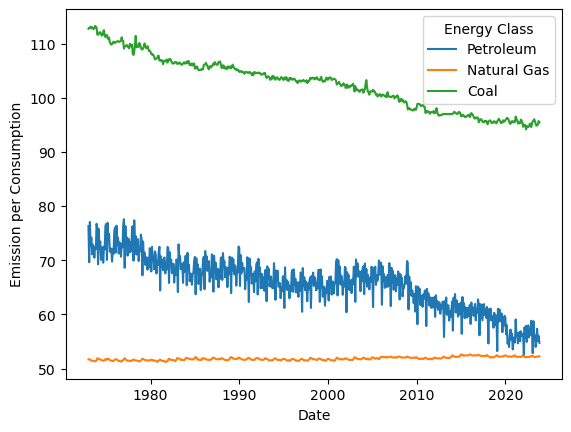

In [144]:
sns.lineplot(x=total_df['Date'],y=total_df['Emission per Consumption'],hue=total_df['Energy Class'])

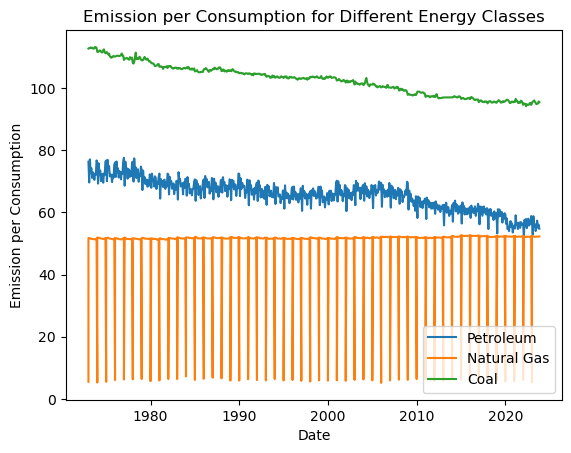

In [145]:
# plot emission per consumption for different energy classes

energy_classes = final_df['Energy Class'].unique()
for energy_class in energy_classes:
    energy_class_df = final_df[final_df['Energy Class'] == energy_class]
    plt.plot(energy_class_df['Date'], energy_class_df['Emission per Consumption'], label=energy_class)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Emission per Consumption')
plt.title('Emission per Consumption for Different Energy Classes')
plt.show()

<Axes: xlabel='Date', ylabel='Emission per Consumption'>

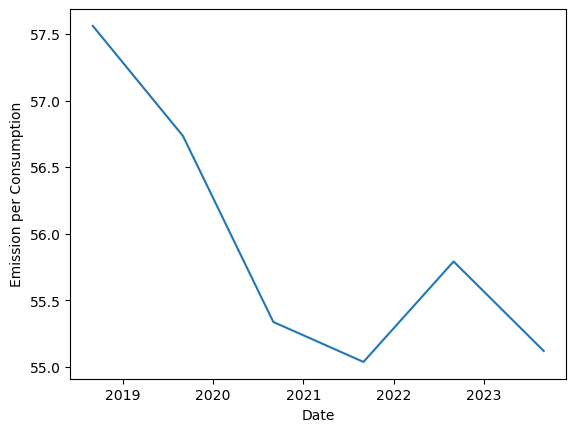

In [71]:
sns.lineplot(data=energy_class_df, x='Date', y='Emission per Consumption')

<Axes: xlabel='Date'>

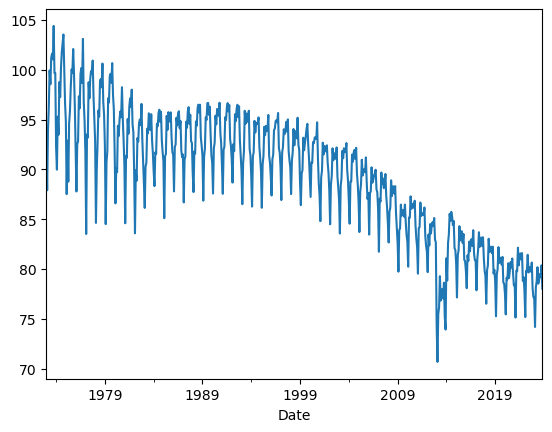

In [13]:
total_df = final_df[final_df['Energy Type'] != 'Total']
total_df = total_df.groupby('Date').sum()
total_df = total_df[['Consumption (quadrillion Btu)', 'Emission (Mton Co2)']]
total_df['Emission/Consumption'] = total_df['Emission (Mton Co2)'] / total_df['Consumption (quadrillion Btu)']
total_df.head()
total_df['Emission/Consumption'].plot()

In [72]:
total_df = final_df

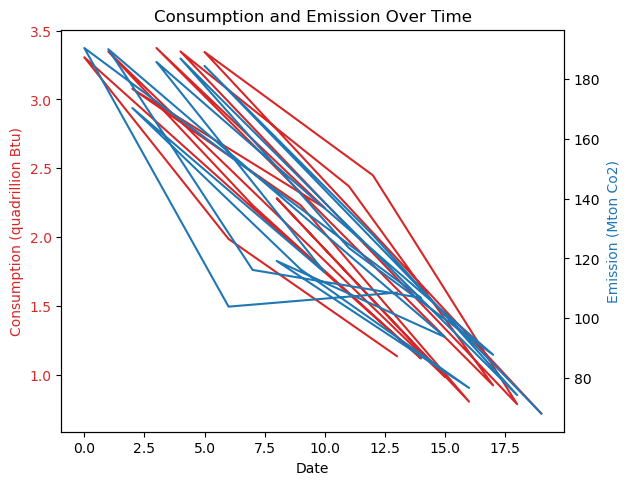

In [73]:
# plot emission and consumption on the same graph but different scales

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Consumption (quadrillion Btu)', color=color)
ax1.plot(final_df.index, final_df['Consumption (quadrillion Btu)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Emission (Mton Co2)', color=color)
ax2.plot(final_df.index, final_df['Emission (Mton Co2)'], color=color)

fig.tight_layout()
plt.title('Consumption and Emission Over Time')
plt.show()

In [74]:
final_df

,Date,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
13,2017-09-01,1.134399,Coal,108.590,95.724689
6,2017-09-01,1.985608,Natural Gas,103.895,52.324032
0,2018-09-01,3.306458,Petroleum,190.321,57.560393
14,2018-09-01,1.117490,Coal,106.823,95.591898
7,2018-09-01,2.230658,Natural Gas,116.161,52.074774
1,2019-09-01,3.347368,Petroleum,189.909,56.733820
15,2019-09-01,0.982104,Coal,93.719,95.426757
8,2019-09-01,2.282262,Natural Gas,119.161,52.211802
16,2020-09-01,0.803689,Coal,76.737,95.480998
9,2020-09-01,2.230382,Natural Gas,116.333,52.158337


In [75]:
# # graph emission and consumption for different energy classes



# # graph emission and consumption for different sectors

# sectors = final_df['Sector'].unique()
# for sector in sectors:
#     sector_df = petroleum[petroleum['Sector'] == sector]
#     plt.scatter(sector_df['Date'], sector_df['Emission (Mton Co2)'], label=sector, alpha = 0.5)

# plt.legend()
# plt.xlabel('Date')
# plt.ylabel('Emission per Consumption')
# plt.title('Consumption for Different Energy Classes')

In [76]:
# # stationary test for consumption in petroleum sector
# from statsmodels.tsa.stattools import adfuller

# sectors = final_df['Sector'].unique()
# for sector in sectors:
#     sector_df = petroleum[petroleum['Sector'] == sector]
#     result = adfuller(sector_df['Consumption (quadrillion Btu)'])
#     print(f'Stationary test for {sector}:')
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))
        

In [77]:
final_df

,Date,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
13,2017-09-01,1.134399,Coal,108.590,95.724689
6,2017-09-01,1.985608,Natural Gas,103.895,52.324032
0,2018-09-01,3.306458,Petroleum,190.321,57.560393
14,2018-09-01,1.117490,Coal,106.823,95.591898
7,2018-09-01,2.230658,Natural Gas,116.161,52.074774
1,2019-09-01,3.347368,Petroleum,189.909,56.733820
15,2019-09-01,0.982104,Coal,93.719,95.426757
8,2019-09-01,2.282262,Natural Gas,119.161,52.211802
16,2020-09-01,0.803689,Coal,76.737,95.480998
9,2020-09-01,2.230382,Natural Gas,116.333,52.158337


<Axes: xlabel='Date'>

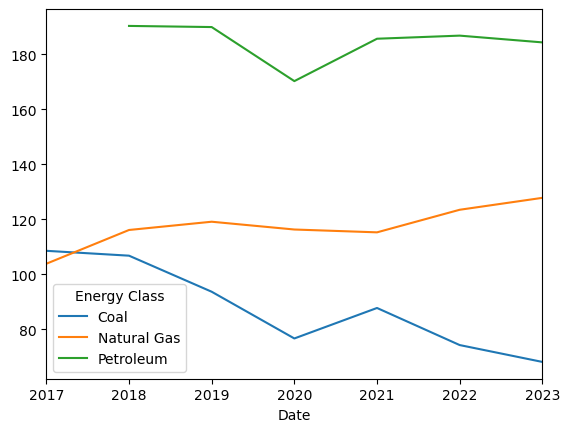

In [78]:
# total emission by energy class
total_emission = final_df.groupby(['Date', 'Energy Class']).sum()
total_emission = total_emission[['Emission (Mton Co2)']]
total_emission = total_emission.unstack()
total_emission.columns = total_emission.columns.droplevel()
total_emission.plot()

In [21]:
energy_class_df

,EIA_ID,Date,Consumption (quadrillion Btu),Column_Order_x,Energy Type,Energy Class,Sector,Emission (Mton Co2),Column_Order_y,Emission per Consumption
19360,CLRCPUS,1973-01-01,0.010010,1,Coal,Coal,Residential,1.142,1,114.087500
20786,CLKCPUS,1973-01-01,0.151120,5,Coal,Coal,Industrial,33.480,1,221.545564
21385,CLACPUS,1973-01-01,0.000000,10,Coal,Coal,Transportation,0.000,1,NaN
21984,CLEIPUS,1973-01-01,0.663980,11,Coal,Coal,Electric Power,73.112,1,110.111808
20594,CLC4PUS,1973-01-01,0.017044,3,Coal,Coal,Commercial,1.945,1,114.117629
...,...,...,...,...,...,...,...,...,...,...
21983,CLACPUS,2023-11-01,0.000000,10,Coal,Coal,Transportation,0.000,1,NaN
21384,CLKCPUS,2023-11-01,0.023901,5,Coal,Coal,Industrial,7.254,1,303.496793
20593,CLC4PUS,2023-11-01,0.000696,3,Coal,Coal,Commercial,0.124,1,178.156477
20592,CLC3PUS,2023-11-01,0.000672,2,Coal,Coal,Commercial,0.124,1,184.613675


Petroleum


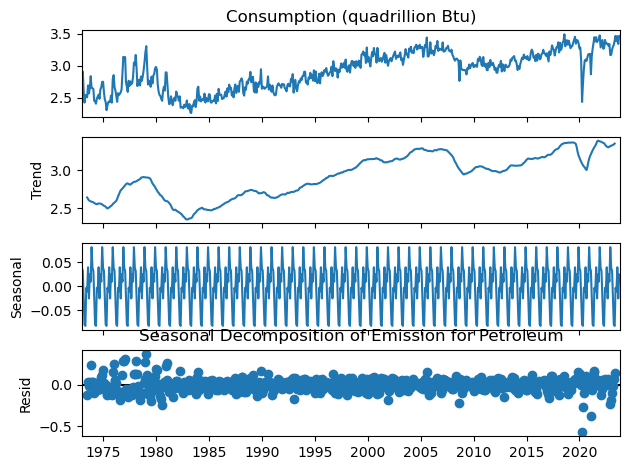

Natural Gas


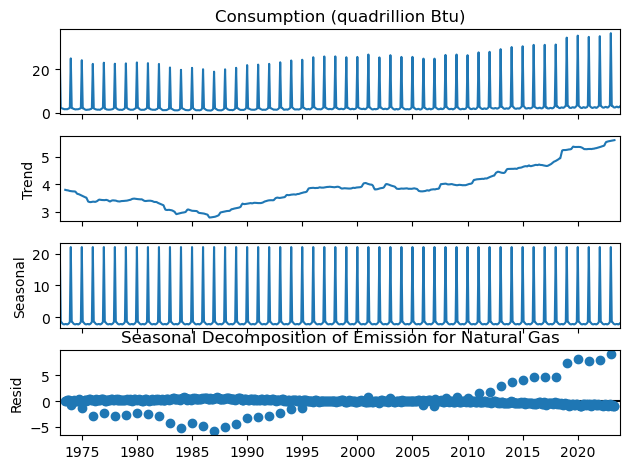

Coal


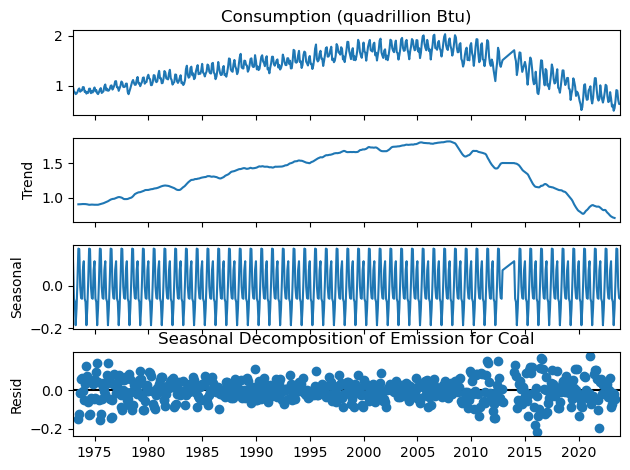

In [146]:
# seasonally decompose the emission data for different energy classes
from statsmodels.tsa.seasonal import seasonal_decompose
energy_classes = final_df['Energy Class'].unique()
for energy_class in energy_classes:
    energy_class_df = final_df[final_df['Energy Class'] == energy_class]
    energy_class_df = energy_class_df.groupby('Date').sum()
    result = seasonal_decompose(energy_class_df['Consumption (quadrillion Btu)'], model='additive', period=12)
    result.plot()
    print(energy_class)
    plt.title(f'Seasonal Decomposition of Emission for {energy_class}')
    plt.show()

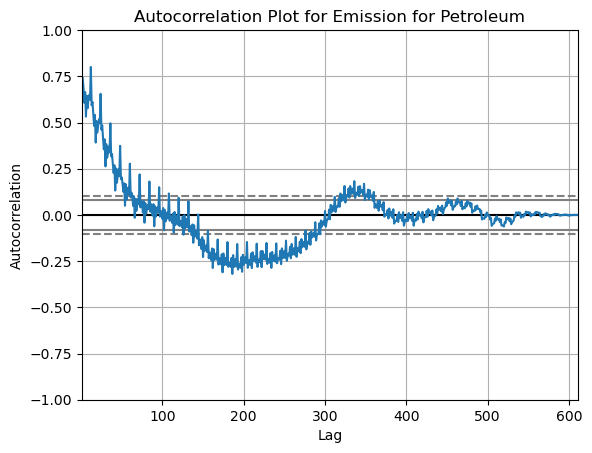

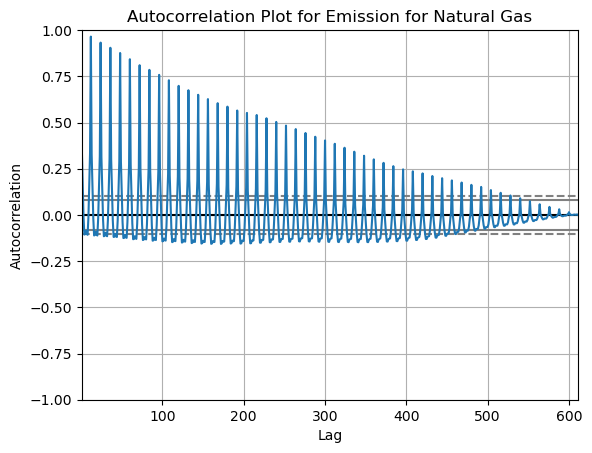

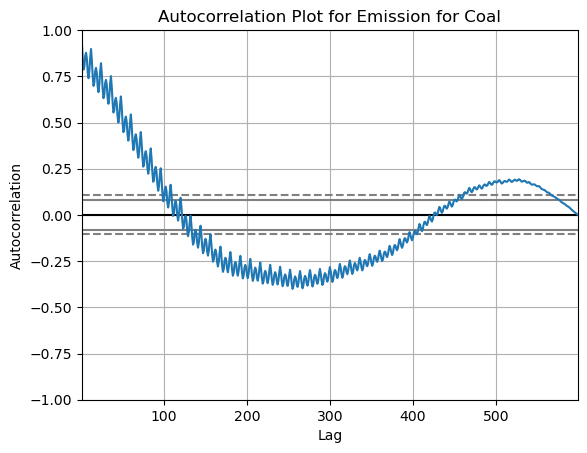

In [147]:
# autocorrelation plot for emission data
from pandas.plotting import autocorrelation_plot
energy_classes = final_df['Energy Class'].unique()
for energy_class in energy_classes:
    energy_class_df = final_df[final_df['Energy Class'] == energy_class]
    energy_class_df = energy_class_df.groupby('Date').sum()
    autocorrelation_plot(energy_class_df['Emission (Mton Co2)'])
    plt.title(f'Autocorrelation Plot for Emission for {energy_class}')
    plt.show()
    

In [25]:
# ptrl = final_df.loc[final_df['Energy Class'] == 'Petroleum']

# x =final_df.loc[final_df['Energy Class'] != 'Petroleum']
# coal = x.loc[x['Energy Class'] == 'Coal']
# x =x.loc[x['Energy Class'] != 'Coal']
# x 

NameError: name 'x' is not defined

In [148]:
final_df.head(50)

,Date,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1973-01-01,2.869340,Petroleum,218.972,76.314422
612,1973-01-01,22.853899,Natural Gas,125.557,5.493898
611,1973-01-01,2.427938,Natural Gas,125.557,51.713427
1273,1973-01-01,0.971831,Coal,109.552,112.727474
865,1973-02-01,2.198380,Natural Gas,113.750,51.742646
203,1973-02-01,2.908295,Petroleum,202.519,69.634951
1472,1973-02-01,0.875494,Coal,98.833,112.888258
916,1973-03-01,2.083601,Natural Gas,107.700,51.689358
1522,1973-03-01,0.872384,Coal,98.483,112.889484
254,1973-03-01,2.611184,Petroleum,201.245,77.070408


In [149]:
final_df.to_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/emi_com.csv")